# Mini Project 2

**This program contains a data analysis on wine. Throughout the program different tasks have been solved, along with small comments and explanations.**

### Enviroment

In [2]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# data structure
import pandas as pd 

# numeric data processing
import numpy as np

### Data reading

#### 1. Load data

In [3]:
red_wine_data = pd.read_excel('/Users/mikkel/Documents/Datamatiker/4 semester/BI/data/winequality-red.xlsx', header=1) # avoid file heading
white_wine_data = pd.read_excel('/Users/mikkel/Documents/Datamatiker/4 semester/BI/data/winequality-white.xlsx', header=1)

#### 2. Clean the data

In [4]:
# view missing values
red_wine_data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
white_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 3. Aggregate the two files

In [6]:
# add column for type of wine in both data set
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'

# combine data
combined_wine_data = pd.concat([red_wine_data, white_wine_data])

In [7]:
# overview of data set
combined_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Explore the data

#### 4. Explore the features of the data sets

In [8]:
# view the sizes of the data sets
print(f"red wine file size:{red_wine_data.shape}")
print(f"white wine file size:{white_wine_data.shape}")
print(f"combined wine file size:{combined_wine_data.shape}")

red wine file size:(1599, 13)
white wine file size:(4898, 13)
combined wine file size:(6497, 13)


In [9]:
# view data types of original and combined data sets
print(f"red wine data types:\n{red_wine_data.dtypes}")
print(f"\nwhite wine data types:\n{white_wine_data.dtypes}")
print(f"\ncombined wine data types:\n{combined_wine_data.dtypes}")

red wine data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

white wine data types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

combined wine data types:
fixed acidity           float64
volatile acidity        float64
citr

#### 5. Calculate the descriptive statistics of the numeric data

In [10]:
# view basic statistics for each column
combined_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
# view counts for each wine type
wine_type_counts = combined_wine_data['wine_type'].value_counts()
print(wine_type_counts)

wine_type
white    4898
red      1599
Name: count, dtype: int64


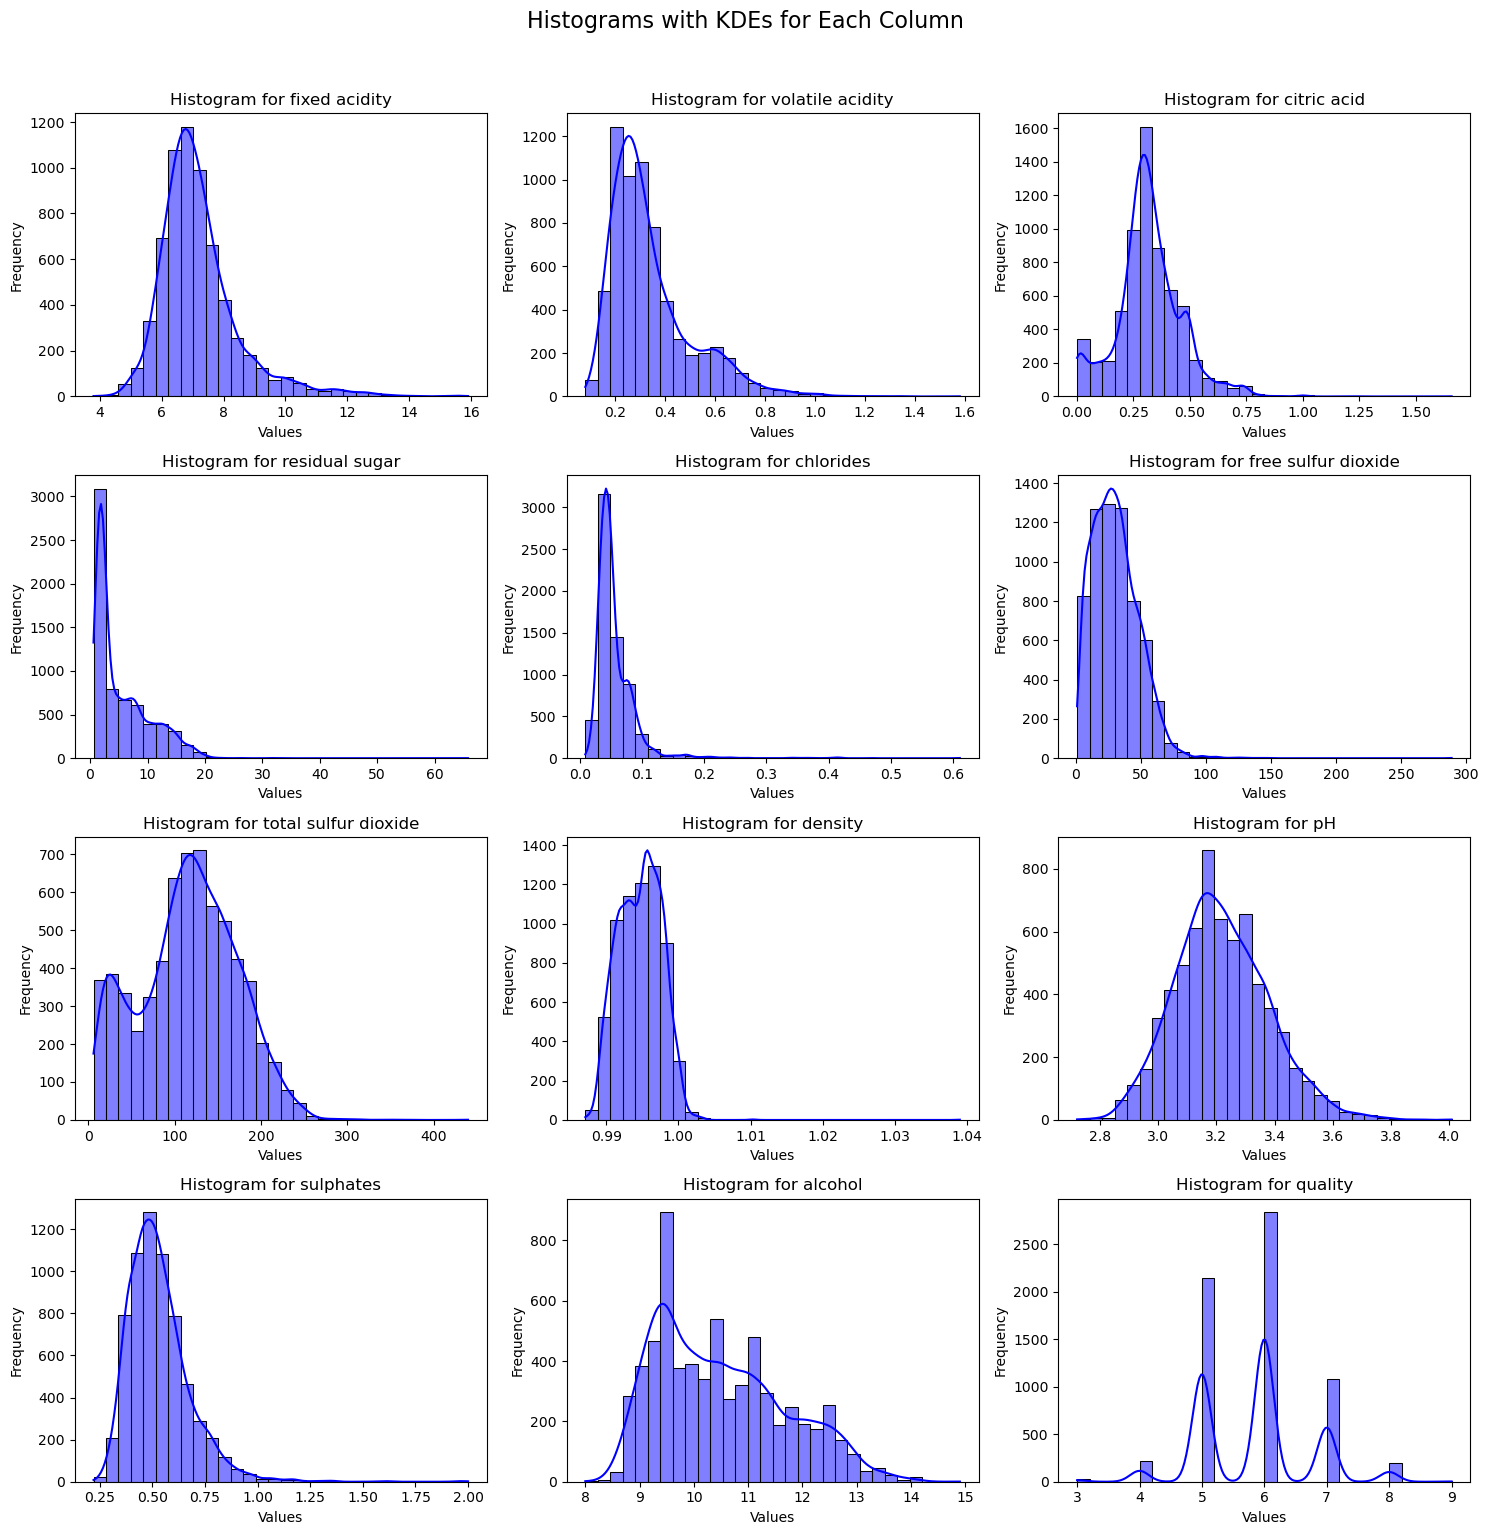

In [12]:
# list of numeric columns
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# subplots in grid structure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Histograms with KDEs for Each Column', y=1.02, fontsize=16)

# loop through each column with index and name 
for i, column in enumerate(numeric_columns):
    # flatten 2D to 1D
    ax = axes.flatten()[i]
    # create Histograms
    sns.histplot(combined_wine_data[column], kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Histogram for {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 6. Diagrams showing the differences between red and white wine sample.

In [13]:
# create a sample of 100 observations
sample_wine_data = combined_wine_data.sample(n=100, random_state=42) # 'random_state' allows for correct reproduction 

# view random sample wine types
wine_type_counts = sample_wine_data['wine_type'].value_counts()
print(wine_type_counts)

wine_type
white    66
red      34
Name: count, dtype: int64


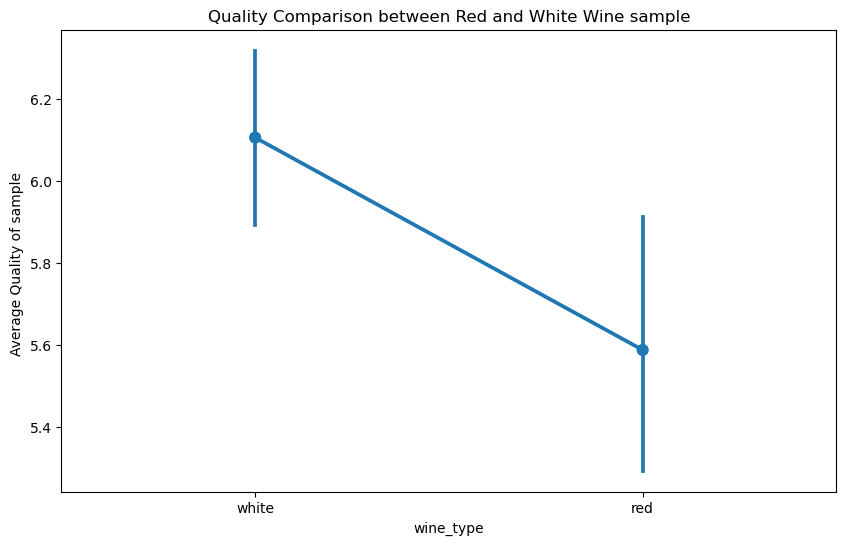

In [14]:
# point plot for quality
plt.figure(figsize=(10, 6))
sns.pointplot(x='wine_type', y='quality', data=sample_wine_data)
plt.title('Quality Comparison between Red and White Wine sample')
plt.ylabel('Average Quality of sample ')
plt.show()

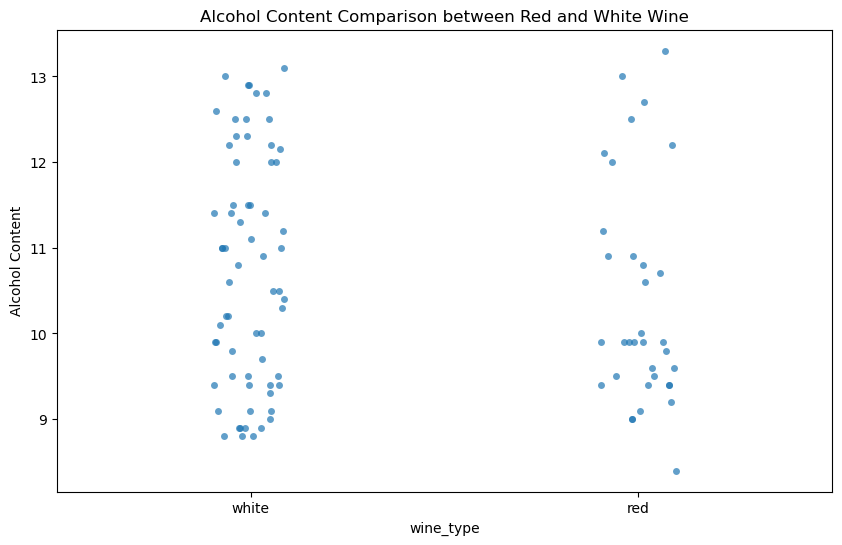

In [15]:
# strip plot for alcohol
plt.figure(figsize=(10, 6))
sns.stripplot(x='wine_type', y='alcohol', data=sample_wine_data, jitter=True, alpha=0.7)
plt.title('Alcohol Content Comparison between Red and White Wine')
plt.ylabel('Alcohol Content')
plt.show()

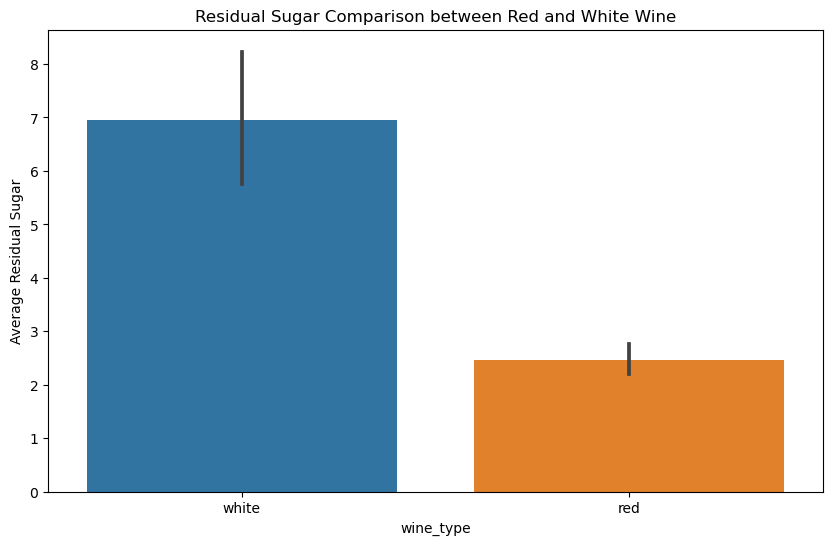

In [16]:
# bar plot for sugar
plt.figure(figsize=(10, 6))
sns.barplot(x='wine_type', y='residual sugar', data=sample_wine_data)
plt.title('Residual Sugar Comparison between Red and White Wine')
plt.ylabel('Average Residual Sugar')
plt.show()

**a. The diagrams show the following:**
   - Comparison of average quality of wine by type
   - Comparison of alcohol content by wine type
   - Comparison of average residual sugar by wine type

**b. White wine seems to have a higher quality on average.**

**c. White wine apears to have a highter alcohol level on average.**

**d. White wine apears to contain a highter level of residual sugar.**

#### 7. Other question that might be of interest for consumers and distributers

**- Are there any correlation between amount of sugar and alcohol?**

**- Are there any correlation between amount of alcohol and quality?**

#### 8. Split the combined data into five subsets by binning the pH.

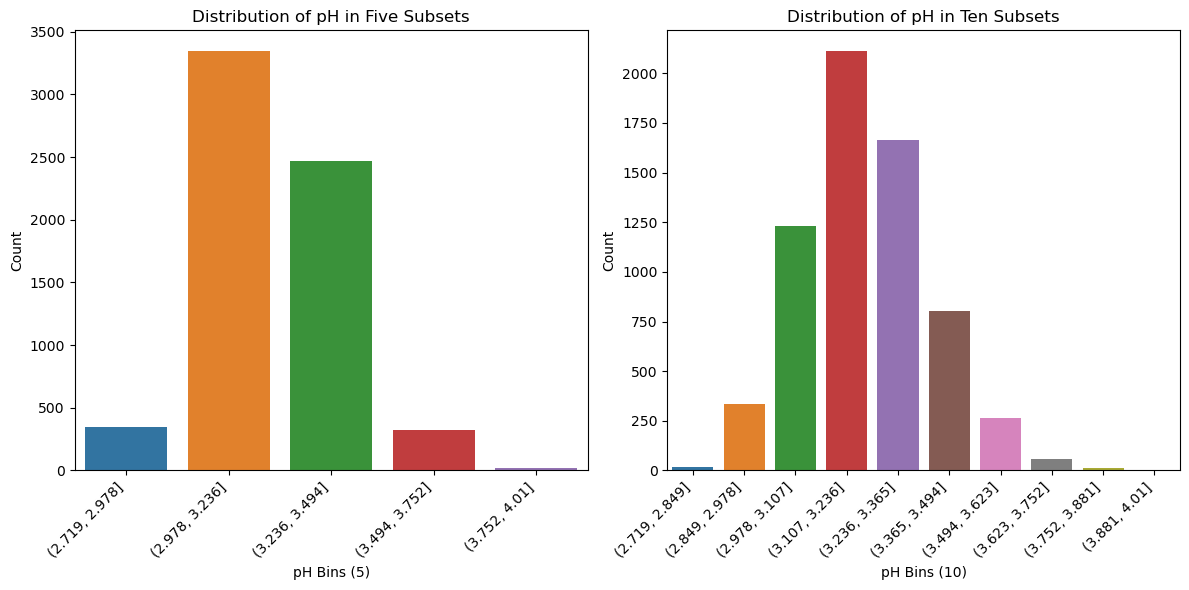

In [17]:
# split data attribute 'pH' into five bins
pH_bins_5 = pd.cut(combined_wine_data['pH'], bins=5)

# ten bins 
pH_bins_10 = pd.cut(combined_wine_data['pH'], bins=10)

# observations in each bin
bin_counts_5 = pH_bins_5.value_counts()
bin_counts_10 = pH_bins_10.value_counts()

# barplot 5 bins
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bar_plot_5 = sns.barplot(x=bin_counts_5.index, y=bin_counts_5.values)
plt.title('Distribution of pH in Five Subsets')
plt.xlabel('pH Bins (5)')
plt.ylabel('Count')

# barplot 10 bins
plt.subplot(1, 2, 2)
bar_plot_10 = sns.barplot(x=bin_counts_10.index, y=bin_counts_10.values)
plt.title('Distribution of pH in Ten Subsets')
plt.xlabel('pH Bins (10)')
plt.ylabel('Count')

# rotate x axis to view values
bar_plot_5.set_xticklabels(bar_plot_5.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_plot_10.set_xticklabels(bar_plot_10.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

#### 9. Heatmap of all data 

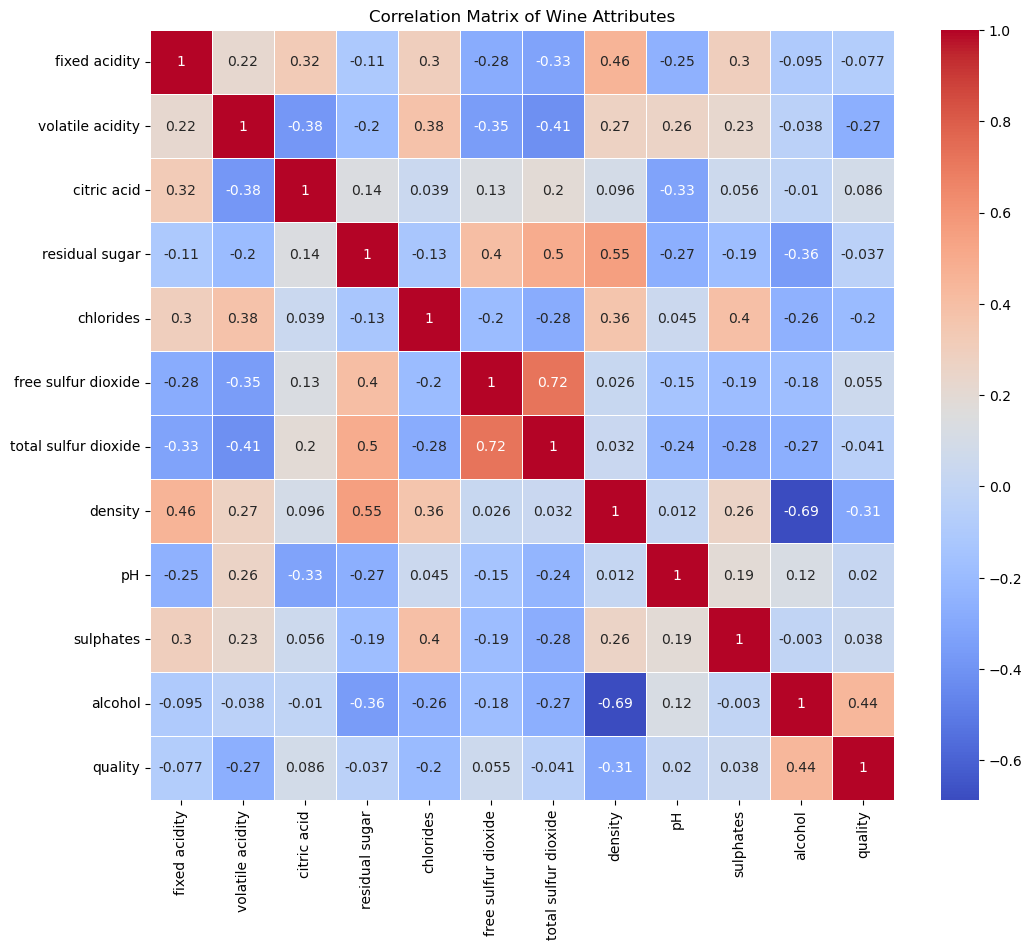

In [18]:
# remove wine_type column 
numerical_wine_data = combined_wine_data.select_dtypes(include=['float64', 'int64'])

# correlation martix for numerical values
correlation_matrix = numerical_wine_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

**- The attribute that has the highest influence on quality is the amount of alcohol.**

**- The attribute with the lowest amount of influence on wine quality appears to be pH.**

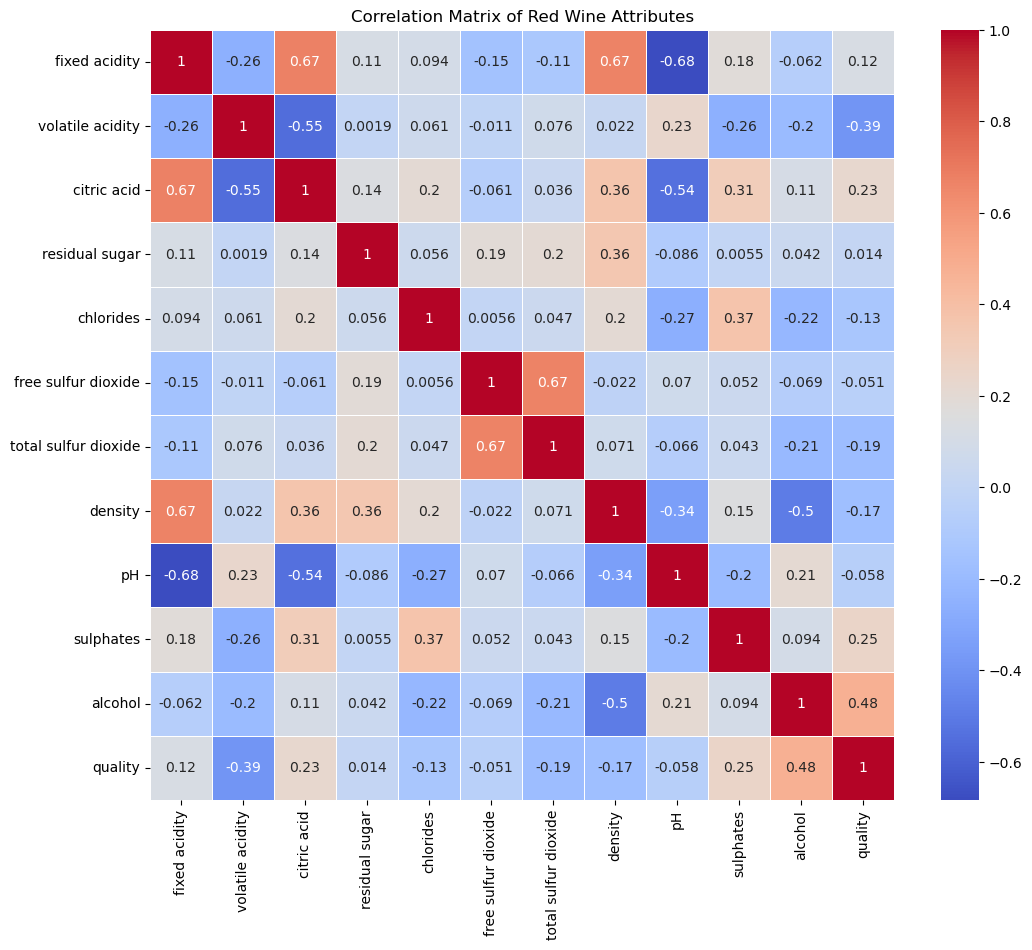

In [19]:
# heatmap of red wines
numerical_wine_data = red_wine_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_wine_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Red Wine Attributes')
plt.show()

**- The attribute that has the highest influence on quality is the amount of alcohol.**

**- The attribute with the lowest amount of influence on wine quality appears to be residual sugar.**

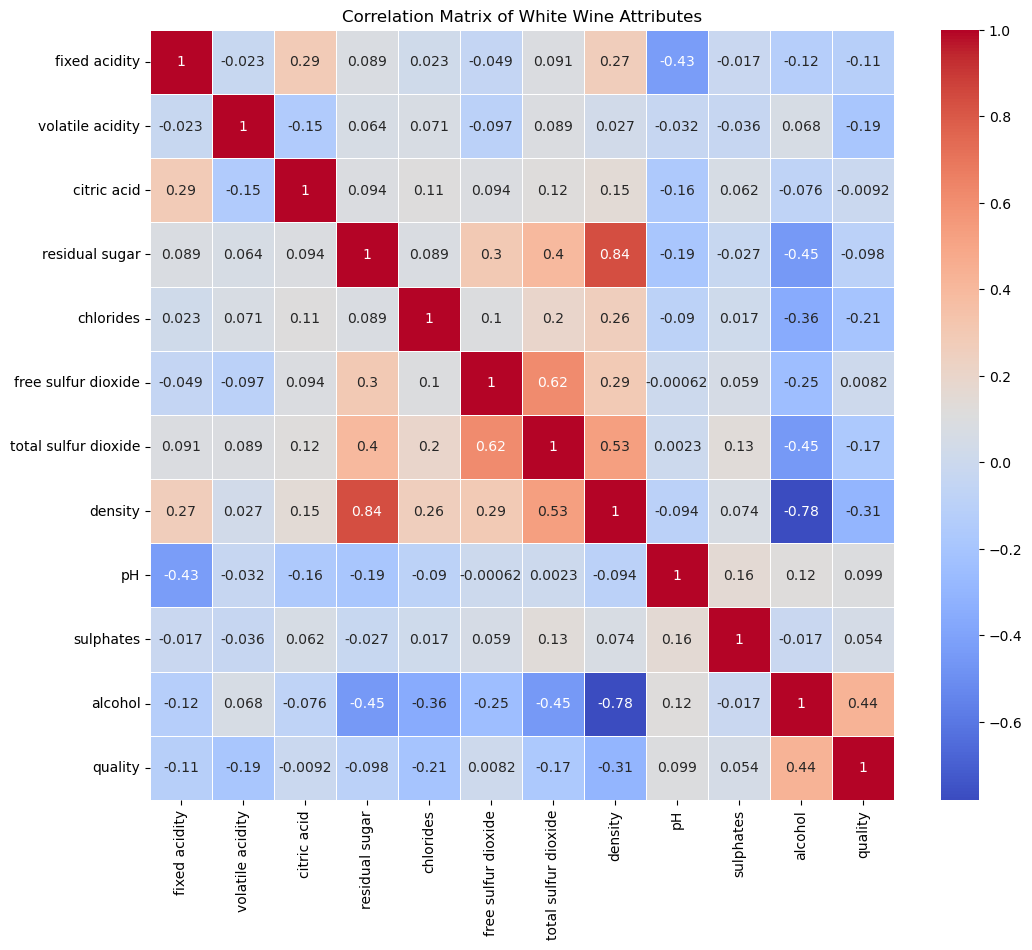

In [20]:
# heatmap of white wines
numerical_wine_data = white_wine_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_wine_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of White Wine Attributes')
plt.show()

**- The attribute that has the highest influence on quality is the amount of alcohol.**

**- The attribute with the lowest amount of influence on wine quality appears to be free sulfur dioxide.**

### Preparation for further analysis

#### 10. Exploration of 'residual sugar'

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64


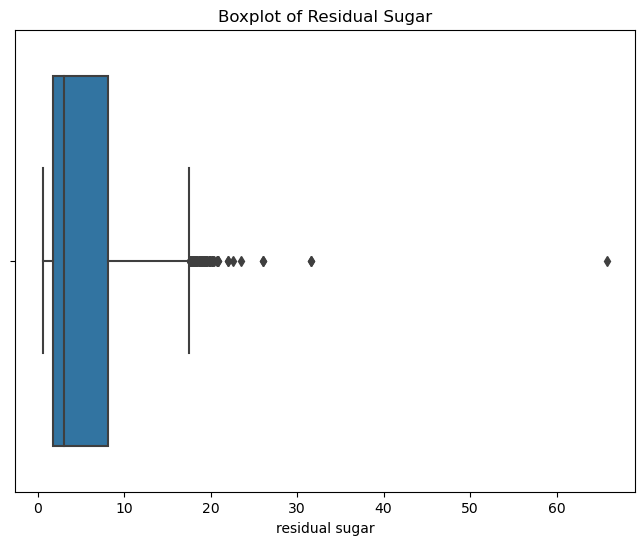

In [21]:
# describing statistics for attribute 'residual sugar'
print(combined_wine_data['residual sugar'].describe())

# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_wine_data['residual sugar'])
plt.title('Boxplot of Residual Sugar')
plt.show()

**There is a clear outlier, which is our highest value 65.**

Row with the highest 'residual sugar':

fixed acidity               7.8
volatile acidity          0.965
citric acid                 0.6
residual sugar             65.8
chlorides                 0.074
free sulfur dioxide         8.0
total sulfur dioxide      160.0
density                 1.03898
pH                         3.39
sulphates                  0.69
alcohol                    11.7
quality                       6
wine_type                 white
Name: 2781, dtype: object


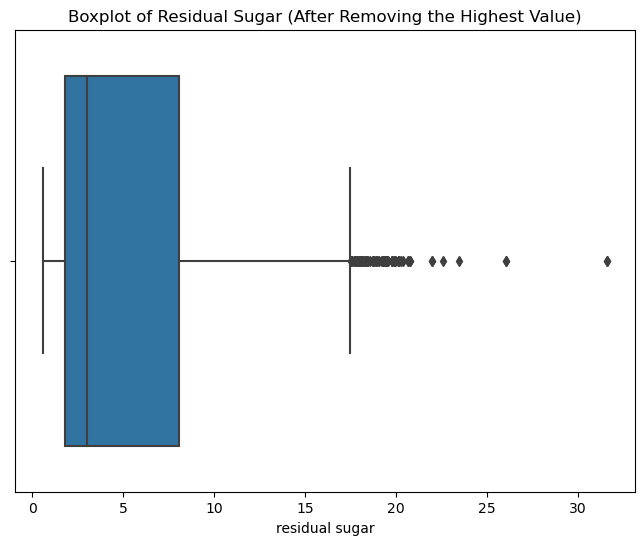

In [22]:
# find the row that contains the max value
max_sugar_row = combined_wine_data.loc[combined_wine_data['residual sugar'].idxmax()]

# view the row
print("Row with the highest 'residual sugar':\n")
print(max_sugar_row)

# remove the row with the highest 'residual sugar'
cleaned_wine_data = combined_wine_data.drop(combined_wine_data['residual sugar'].idxmax())

# check that the max 'residual sugar' value no longer exsist
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_wine_data['residual sugar'])
plt.title('Boxplot of Residual Sugar (After Removing the Highest Value)')
plt.show()


#### 11. The attribute with the lowest correlation to wine quality

In [23]:
# remove column with attribute 'pH'
combined_wine_data = combined_wine_data.drop('pH', axis=1)

# view dataset 
combined_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,0.38,12.8,7,white


#### 12. Transform categorical data into numeric

In [24]:
# map values for 'wine_type'
wine_type_mapping = {'red': 0, 'white': 1}
combined_wine_data['wine_type'] = combined_wine_data['wine_type'].map(wine_type_mapping)

#view dataset
combined_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,0.38,12.8,7,1


#### 13. Reduce the number of features using PCA

In [25]:
# normalization of data
scaler = StandardScaler()
combined_wine_data_scaled = scaler.fit_transform(combined_wine_data)

# view
combined_wine_data_scaled

array([[ 0.14247327,  2.18883292, -2.19283252, ..., -0.91546416,
        -0.93722961, -1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.58006813,
        -0.93722961, -1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, ..., -0.58006813,
        -0.93722961, -1.75018984],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.91546416,
         0.20799905,  0.57136659],
       [-1.32319841, -0.30169391, -0.12823371, ...,  1.9354021 ,
         1.35322771,  0.57136659],
       [-0.93749534, -0.78765037,  0.42232597, ...,  1.09691202,
         0.20799905,  0.57136659]])

**StandardScaler subtracts avgerages for each value and then divides it with the standard deviation. This makes sure that the data has an average value of 0 and a standard deviation of 1.** 

In [26]:
# convert normalised data into a dataframe
combined_wine_data_scaled_df = pd.DataFrame(combined_wine_data_scaled, columns=['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 'pc 11', 'pc 12'])

# view normalized data frame
combined_wine_data_scaled_df

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,pc 11,pc 12
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,0.193097,-0.915464,-0.937230,-1.750190
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,0.999579,-0.580068,-0.937230,-1.750190
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.797958,-0.580068,-0.937230,-1.750190
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,0.327510,-0.580068,0.207999,-1.750190
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,0.193097,-0.915464,-0.937230,-1.750190
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,-0.210144,0.593818,0.207999,0.571367
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.478971,-0.747766,-0.937230,0.571367
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-0.478971,-0.915464,0.207999,0.571367
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,-1.016626,1.935402,1.353228,0.571367


In [27]:
# use PCA to reduce dimensions and keep the most important attributes
# 5 columns
pca = PCA(n_components=5)
combined_wine_data_pca = pca.fit_transform(combined_wine_data_scaled)

In [28]:
# explore result
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for the 5 columns:\n", explained_variance)

Explained Variance for the 5 columns:
 [0.3124691  0.21692842 0.12400438 0.07762904 0.07071621]


**Above can be seen that the first PC is responsible for 31,47% variance, the second PC for 16,34% and so on**

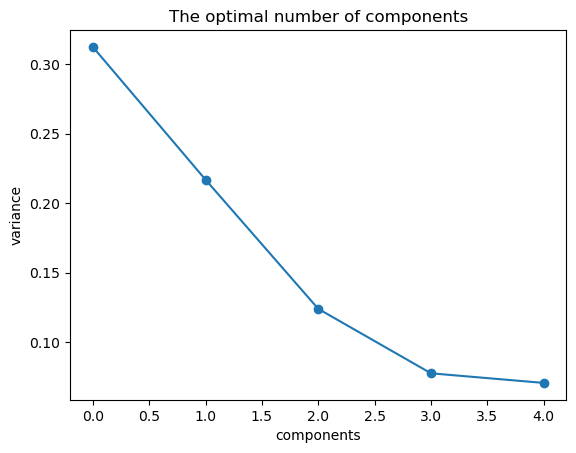

In [29]:
# plot experienced variance
plt.plot(explained_variance, marker='o')
plt.xlabel('components')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

**Below is a cumulative varians graph that visualizes how much varians each component represents. This graph give us an idea of how many components to keep**

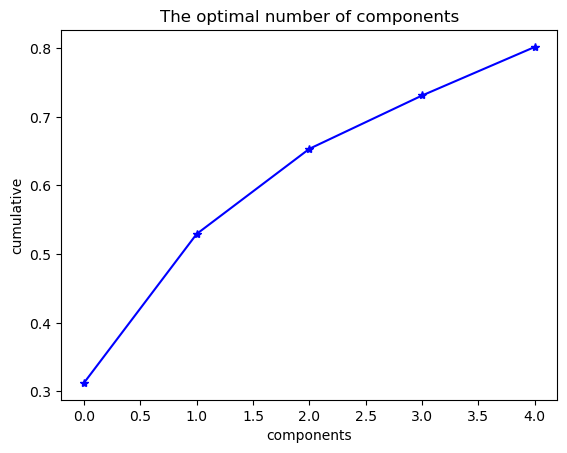

In [30]:
# plot cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

#### 14. Ten random rows from the dataset

In [31]:
# reduced dataset shown in data frame
combined_wine_data_pca_df = pd.DataFrame(combined_wine_data_pca, columns=[f'PC{i+1}' for i in range(combined_wine_data_pca.shape[1])])

# 10 random rows 
ten_random_rows = combined_wine_data_pca_df.sample(10)

# view
ten_random_rows

,PC1,PC2,PC3,PC4,PC5
2272,-0.267377,-0.983465,0.015324,0.034326,0.417784
5270,-1.420681,-2.507384,0.189427,-0.052039,-1.250970
3281,-2.126633,2.333368,0.063329,1.131000,-1.281648
1751,-0.673816,-0.068870,-0.383964,-0.785835,-0.083716
853,2.386621,0.147145,1.564375,0.567748,0.339311
3498,-0.664484,-2.527459,0.467499,1.155042,0.126106
951,2.476514,-1.853890,2.229798,0.123056,-0.455206
4519,-0.238201,0.901018,-0.321598,-1.907641,-0.683640
2106,-1.386748,-0.532086,-0.002286,1.042255,0.470280
5800,-0.607570,-2.015600,-0.723257,-0.754216,-0.375286


**So now we have reduced our data, and this will make it easier for us if we want to continue working with the data to train a model, feature importance etc.**